In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1= pd.read_csv("US_births_1994-2003_CDC_NCHS.csv")
data1.head()

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


In [3]:
data2= pd.read_csv('US_births_2000-2014_SSA.csv')
data2.head()

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558


In [4]:
birth_data = pd.merge(data1,data2, how='outer')

In [5]:
birth_data.rename(columns={'date_of_month': 'day'}, inplace=True)


In [6]:
birth_data.isna().sum()

year           0
month          0
day            0
day_of_week    0
births         0
dtype: int64

In [7]:
from scipy import stats

#checking for outliers
z_scores = stats.zscore(birth_data)
outliers = np.where((z_scores >= 3) | (z_scores <= -3))
outliers



(array([], dtype=int64), array([], dtype=int64))

Looks like there are no outliers

In [8]:
#check for duplicate
birth_data.duplicated().sum()

0

No duplicates

In [9]:
from statsmodels.tsa.stattools import adfuller


#checking for stationarity 
flattened_data = birth_data.values
flat = flattened_data.flatten()
result = adfuller(flat)    
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -13.322821
p-value: 0.000000


p-value is lesser than 0.5 so this data is not stationary.

In [10]:
#formating to a datetime datatype
birth_data['datetime'] = pd.to_datetime(birth_data[['year', 'month', 'day']], format='%Y-%m-%d')
#birth_data.drop(['year', 'month', 'day'], axis=1, inplace=True)
birth_data 

,year,month,day,day_of_week,births,datetime
0,1994,1,1,6,8096,1994-01-01
1,1994,1,2,7,7772,1994-01-02
2,1994,1,3,1,10142,1994-01-03
3,1994,1,4,2,11248,1994-01-04
4,1994,1,5,3,11053,1994-01-05
...,...,...,...,...,...,...
9126,2014,12,27,6,8656,2014-12-27
9127,2014,12,28,7,7724,2014-12-28
9128,2014,12,29,1,12811,2014-12-29
9129,2014,12,30,2,13634,2014-12-30


In [11]:
birth_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9131 entries, 0 to 9130
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   year         9131 non-null   int64         
 1   month        9131 non-null   int64         
 2   day          9131 non-null   int64         
 3   day_of_week  9131 non-null   int64         
 4   births       9131 non-null   int64         
 5   datetime     9131 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 499.4 KB


Text(0, 0.5, 'Mean births')

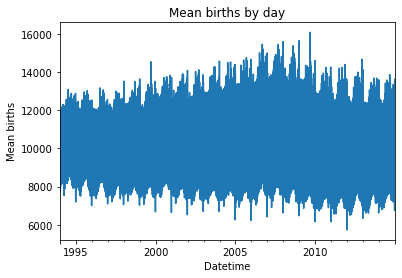

In [12]:
plot1 = birth_data.groupby('datetime')['births'].mean()
# Plot the result as a line plot
plot1.plot()
# Add a title and labels to the axes
plt.title("Mean births by day")
plt.xlabel("Datetime")
plt.ylabel("Mean births")

Text(0, 0.5, 'Mean births')

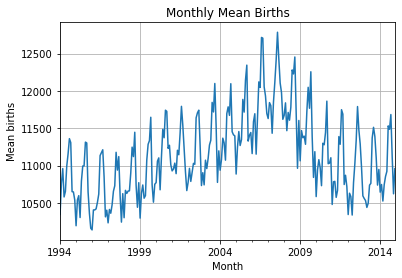

In [13]:
downsampled_data = birth_data.resample('M', on='datetime').mean()
downsampled_data.births.plot()
plt.grid()
plt.title("Monthly Mean Births")
plt.xlabel("Month")
plt.ylabel("Mean births")

We observe seasonality when downsampled to the month.

Text(0, 0.5, 'Mean births')

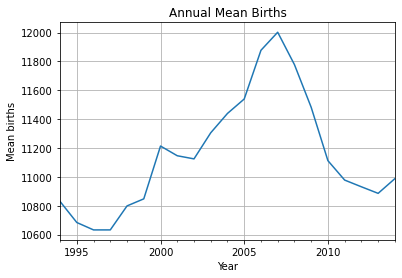

In [14]:
downsampled_data = birth_data.resample('A', on='datetime').mean()
downsampled_data.births.plot()
plt.grid()
plt.title("Annual Mean Births")
plt.xlabel("Year")
plt.ylabel("Mean births")

And we observe a trend when downsample to annual observation. 

In [15]:
birth_data.head()

,year,month,day,day_of_week,births,datetime
0,1994,1,1,6,8096,1994-01-01
1,1994,1,2,7,7772,1994-01-02
2,1994,1,3,1,10142,1994-01-03
3,1994,1,4,2,11248,1994-01-04
4,1994,1,5,3,11053,1994-01-05


In [16]:
df=birth_data

In [17]:
df.head()

,year,month,day,day_of_week,births,datetime
0,1994,1,1,6,8096,1994-01-01
1,1994,1,2,7,7772,1994-01-02
2,1994,1,3,1,10142,1994-01-03
3,1994,1,4,2,11248,1994-01-04
4,1994,1,5,3,11053,1994-01-05


In [18]:
df.shape

(9131, 6)

In [19]:
avg_by_year= df.groupby('year').mean()

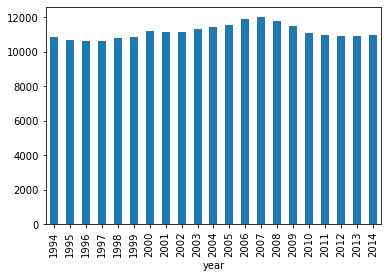

In [20]:
avg_by_year.births.plot(kind = 'bar')

plt.show()

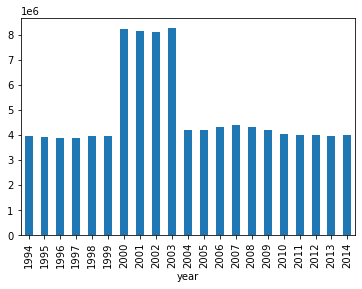

In [21]:
sum_by_year= df.groupby('year').sum()

sum_by_year.births.plot(kind = 'bar')

plt.show()

# Total sum of births per year

In [22]:
births_yr = df[['year', 'births']].groupby(by = 'year').sum()

births_yr

,births
year,
1994,3952767
1995,3899589
1996,3891494
1997,3880894
1998,3941553
1999,3959417
2000,8208412
2001,8136896
2002,8121039


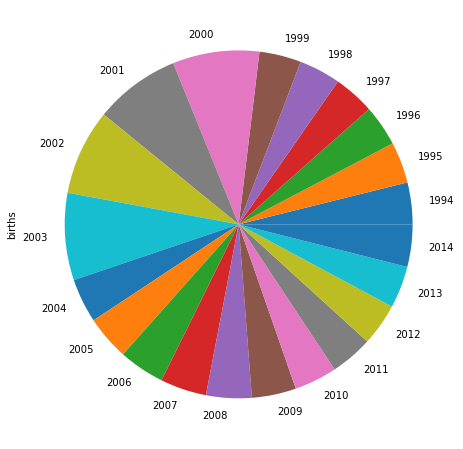

In [23]:
births_yr.plot.pie(y='births', 
                       figsize = (8, 8), legend = False)

plt.show()

The year 2003 has the highest rate of births

In [24]:
df.describe()

,year,month,day,day_of_week,births
count,9131.000000,9131.000000,9131.000000,9131.000000,9131.000000
mean,2003.599825,6.523053,15.729274,3.999781,11160.788632
std,5.642836,3.448858,8.800420,2.000493,2163.504477
min,1994.000000,1.000000,1.000000,1.000000,5728.000000
25%,2000.000000,4.000000,8.000000,2.000000,8787.000000
50%,2003.000000,7.000000,16.000000,4.000000,11998.000000
75%,2008.000000,10.000000,23.000000,6.000000,12774.000000
max,2014.000000,12.000000,31.000000,7.000000,16081.000000


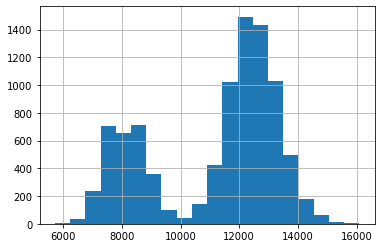

In [25]:
df['births'].hist(bins=20)

plt.show()

The median of all the births in the years is above 11500

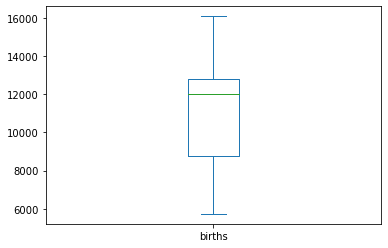

In [26]:
df['births'].plot(kind = 'box')

plt.show()

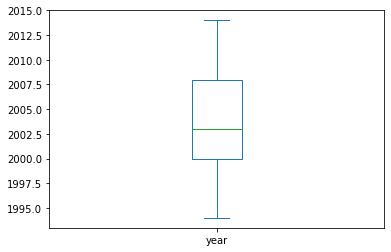

In [27]:
df['year'].plot(kind = 'box')

plt.show()

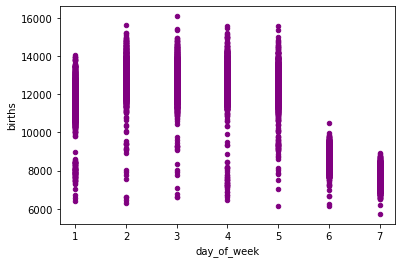

In [28]:
df.plot.scatter(x = 'day_of_week', 
                       y = 'births',
               color = 'purple')

plt.show()

In [29]:
df.head()

,year,month,day,day_of_week,births,datetime
0,1994,1,1,6,8096,1994-01-01
1,1994,1,2,7,7772,1994-01-02
2,1994,1,3,1,10142,1994-01-03
3,1994,1,4,2,11248,1994-01-04
4,1994,1,5,3,11053,1994-01-05


In [30]:
df=df.set_index('datetime')
df.drop(['year', 'month', 'day'], axis=1, inplace=True)

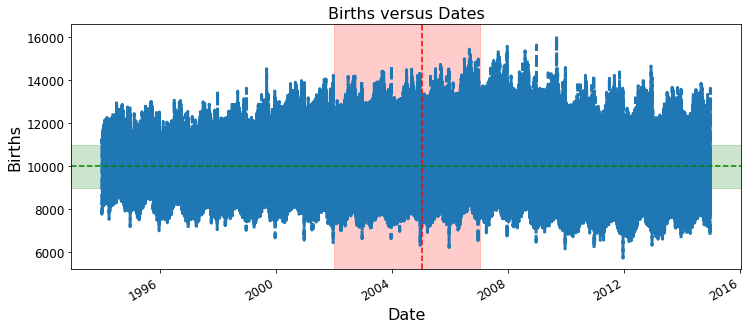

In [59]:
import matplotlib.pyplot as plt

#plt.style.use('ggplot')
#df.plot()

#ax=df.plot(color='blue')
ax= df['births'].plot(figsize=(12,5), fontsize=12, linewidth=3, linestyle='--')
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Births", fontsize=16)
ax.set_title("Births versus Dates", fontsize=16)


ax.axvline('2005-01-13', color='red', linestyle='--')
ax.axhline(10000, color='green', linestyle='--')


ax.axvspan('2002-01-10', '2007-01-15', color= 'red', alpha= 0.2)
ax.axhspan(9000, 11000, color= 'green', alpha= 0.2)


plt.show()


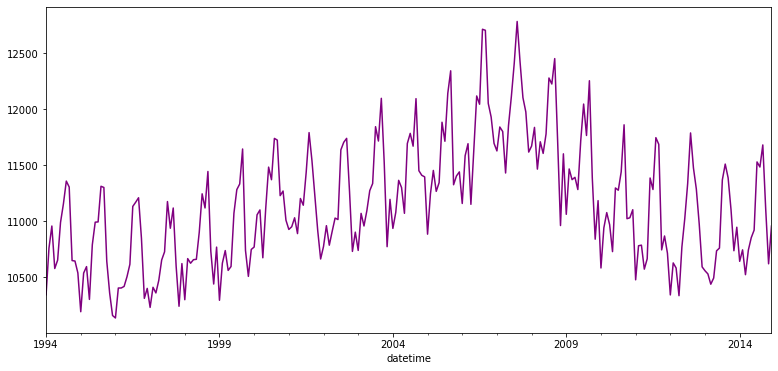

In [32]:
monthly_mean = df['births'].resample('M').mean()

monthly_mean.plot(figsize=(13,6), color='purple')

plt.show()

In [34]:
df_year= df['births'].rolling(window=52).mean()

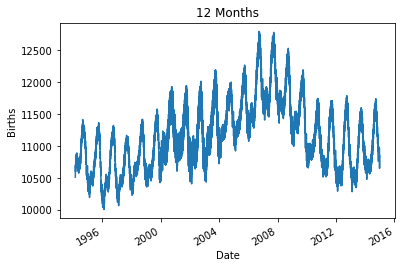

In [35]:
ax= df_year.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Births")
ax.set_title("12 Months")

plt.show()

In [36]:
df.drop('day_of_week', axis=1, inplace=True)

In [38]:
index_month= df.index.month

In [39]:
df_months_birth=df.groupby(index_month).mean()

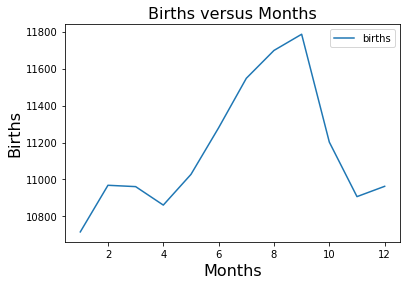

In [40]:
ax=df_months_birth.plot()

ax.set_xlabel("Months", fontsize=16)
ax.set_ylabel("Births", fontsize=16)
ax.set_title("Births versus Months", fontsize=16)

plt.show()

In [43]:
index_day= df.index.day

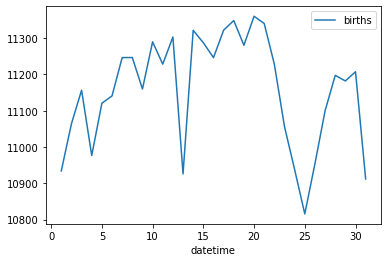

In [44]:
df_day_birth=df.groupby(index_day).mean()

df_day_birth.plot()

plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9131 entries, 1994-01-01 to 2014-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   births  9131 non-null   int64
dtypes: int64(1)
memory usage: 142.7 KB


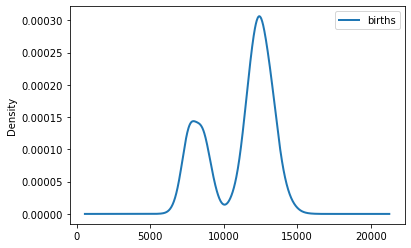

In [46]:
ax3= df.plot(kind='density', linewidth=2
            )

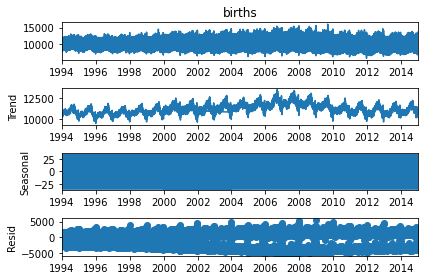

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition =seasonal_decompose(df['births'], period=12)
decomposition.plot()

plt.show()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9131 entries, 1994-01-01 to 2014-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   births  9131 non-null   int64
dtypes: int64(1)
memory usage: 142.7 KB


<AxesSubplot:xlabel='datetime'>

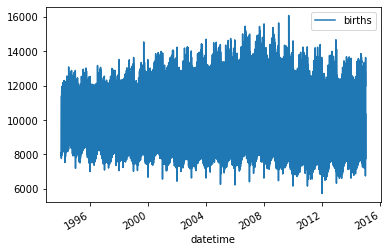

In [50]:
df.plot()